In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
os.listdir('data/')

['sample_submission.csv',
 'test_data.csv',
 'text_emotion.csv',
 'tf_idf_data.zip',
 'train_data.csv']

In [4]:
df = pd.read_csv('data/text_emotion.csv')
print (df.shape)
df.head()

(40000, 4)


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [5]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

Let's filter out the columns we require

In [6]:
cols = ['sentiment', 'content']
df = df[cols]

We will now run various feature extraction tools to get a good idea about our data.

### 1. Text Preprocessing

In [7]:
from text_utils.text_processing import process_text

process_text(df['content'].iloc[1])

'layin n bed headache ughhhh waitin call '

In [8]:
#!pip install nltk
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('brown')
#nltk.download('averaged_perceptron_tagger')

### 2. Feature extraction

Setting up Vader NLP.
#### 2.1. Vader Sentiment Feature Extraction

In [9]:
#!pip install requests

In [10]:
#!pip install vaderSentiment

In [11]:
from text_utils.vader_feature_extraction import sentiment_analyzer_scores

In [12]:
sentiment_analyzer_scores(df['content'].iloc[0])

{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound': -0.5423}

#### 2.2. Textblob NLP Feature Extraction

In [13]:
#!pip install textblob

In [14]:
from text_utils.text_blob_feature_extraction import get_textblob_features
get_textblob_features(df['content'].iloc[1002])

{'Number of Noun Phrases': 1,
 'Number of POS tags': 11,
 'Sentence Polarity': -0.1,
 'Sentence Subjectivity': -0.1,
 'Number of words': 11,
 'Language Detected': 'en'}

#### 2.3. spaCy Feature Extraction
Ref. https://spacy.io/usage/spacy-101

In [15]:
#!pip install spacy

In [16]:
from text_utils.spacy_feature_extraction import get_entities

In [17]:
#import spacy
#!python -m spacy download en_core_web_sm

In [18]:
get_entities(process_text(df['content'].iloc[110]))

{'DATE': 'weekend'}

#### 2.4. afinn Sentiment score

In [19]:
#!pip install afinn

In [20]:
from afinn import Afinn
afinn = Afinn()

def afinn_score(sentence):
    return afinn.score(sentence)

#### 3.1. Processing the sentence

In [41]:
## Processing the text for NLP
df['processed_sentence'] = df['content'].apply(lambda x: process_text(x))

#### 2.6. Encode Target

In [216]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(final_vector_df['sentiment'])
final_vector_df['Encoded Targets'] = le.transform(final_vector_df['sentiment'])

### 3. Preparing Training Data

In [42]:
df.head()

,index,sentiment,content,processed_sentence
0,0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...
1,1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call
2,2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one


Getting the String Length

In [43]:
df['String_Length'] =  df['processed_sentence'].apply(lambda x: len(x))

In [44]:
df = df[df['String_Length']>3]

In [45]:
df['String_Length'].max()

134

#### 3.2. Vader Sentiment Extraction

In [120]:
def generate_vader_features(sentence):
    
    return sentiment_analyzer_scores(sentence)

In [121]:
generate_vader_features(df['processed_sentence'].iloc[0])

{'neg': 0.333, 'neu': 0.667, 'pos': 0.0, 'compound': -0.5423}

In [43]:
## Vader Sentiment Feature Extraction

df['vader_neg'] = df['processed_sentence'].apply(lambda x: sentiment_analyzer_scores(x)['neg'])
df['vader_neu'] = df['processed_sentence'].apply(lambda x: sentiment_analyzer_scores(x)['neu'])
df['vader_pos'] = df['processed_sentence'].apply(lambda x: sentiment_analyzer_scores(x)['pos'])
df['vader_compound'] = df['processed_sentence'].apply(lambda x: sentiment_analyzer_scores(x)['compound'])

#### 3.3. POS Frequency Generation

In [22]:
from text_utils.pos_frequency_generation import *

In [24]:
## Processing the text for NLP
df['processed_sentence'] = df['content'].apply(lambda x: process_text(x))

In [28]:
get_pos_frequency(df['processed_sentence'].iloc[0])

{'CC': 0.07142857142857142,
 'CD': 0.2,
 'DT': 0.08333333333333333,
 'EX': 0.14285714285714285,
 'FW': 0.125,
 'IN': 0.1111111111111111,
 'JJ': 0.25,
 'JJR': 0.07142857142857142,
 'JJS': 0.16666666666666666,
 'LS': 0,
 'MD': 0.2,
 'NN': 0.375,
 'NNS': 0.375,
 'NNP': 0.16666666666666666,
 'NNPS': 0,
 'PDT': 0.16666666666666666,
 'POS': 0.1111111111111111,
 'PRP': 0.1111111111111111,
 'PRP$': 0.07692307692307693,
 'RB': 0.1111111111111111,
 'RBR': 0.125,
 'RBS': 0.05555555555555555,
 'RP': 0.16666666666666666,
 'TO': 0.07692307692307693,
 'UH': 0.06666666666666667,
 'VB': 0.125,
 'VBD': 0.1111111111111111,
 'VBG': 0.14285714285714285,
 'VBN': 0.125,
 'VBP': 0.1875,
 'VBZ': 0.07692307692307693,
 'WDT': 0.07142857142857142,
 'WP': 0.07142857142857142,
 'WP$': 0.07692307692307693,
 'WRB': 0.0625,
 '$': 0.06666666666666667,
 'SYM': 0.07142857142857142,
 "''": 0.2}

In [29]:
for i in pos_tag_list:
    df[i] = 0

In [ ]:
for i in range(df.shape[0]):
    pos_frequency_dict = get_pos_frequency(df['processed_sentence'].iloc[i])
    
    for j in range(len(pos_tag_list)):
        df[pos_tag_list[j]].iloc[i] = pos_frequency_dict[pos_tag_list[j]]
        
    print (i)

In [42]:
df[pos_tag_list].head()

,CC,CD,DT,EX,FW,IN,JJ,JJR,JJS,LS,...,VB,VBD,VBG,VBN,VBP,VBZ,WDT,WP,WP$,WRB
0,0.071429,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,0.071429,0.166667,0,...,0.125,0.111111,0.142857,0.125,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625
1,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.142857,0.071429,0.166667,0,...,0.125,0.111111,0.142857,0.125,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625
2,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,0.071429,0.166667,0,...,0.125,0.111111,0.142857,0.125,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625
3,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,0.071429,0.166667,0,...,0.125,0.111111,0.142857,0.125,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625
4,0.142857,0.166667,0.083333,0.142857,0.125,0.111111,0.166667,0.071429,0.166667,0,...,0.125,0.111111,0.142857,0.125,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625


In [44]:
df.head()

,sentiment,content,processed_sentence,CC,CD,DT,EX,FW,IN,JJ,...,VBP,VBZ,WDT,WP,WP$,WRB,vader_neg,vader_neu,vader_pos,vader_compound
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...,0.071429,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625,0.333,0.667,0.000,-0.5423
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.142857,...,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,1.000,0.000,0.0000
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625,0.672,0.328,0.000,-0.4767
3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,0.308,0.692,0.5423
4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one,0.142857,0.166667,0.083333,0.142857,0.125,0.111111,0.166667,...,0.1875,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,0.794,0.206,0.0772


#### 3.3. TextBlob Feature Extraction

In [37]:
get_textblob_features(df['content'].iloc[1002])

{'Number of Noun Phrases': 1,
 'Number of POS tags': 6,
 'Sentence Polarity': -0.1,
 'Sentence Subjectivity': -0.1,
 'Number of words': 6,
 'Language Detected': 'en'}

In [88]:
## TextBlob Feature Extraction
'''
#try:
df['Number of Noun Phrases'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of Noun Phrases'])
df['Number of POS tags'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of POS tags'])
df['Sentence Polarity'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Sentence Polarity'])
df['Sentence Subjectivity'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Sentence Subjectivity'])
df['Number of words'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of words'])
#except:
#    pass
'''

"\n#try:\ndf['Number of Noun Phrases'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of Noun Phrases'])\ndf['Number of POS tags'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of POS tags'])\ndf['Sentence Polarity'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Sentence Polarity'])\ndf['Sentence Subjectivity'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Sentence Subjectivity'])\ndf['Number of words'] = df['processed_sentence'].apply(lambda x: get_textblob_features(x)['Number of words'])\n#except:\n#    pass\n"

TextBlob accepts strings with minimum 3 characters.

#### 3.4. Afinn Score

In [45]:
df['afinn score'] = df['processed_sentence'].apply(lambda x: afinn_score(x))

In [46]:
df.head()

,sentiment,content,processed_sentence,CC,CD,DT,EX,FW,IN,JJ,...,VBZ,WDT,WP,WP$,WRB,vader_neg,vader_neu,vader_pos,vader_compound,afinn score
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...,0.071429,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.333,0.667,0.000,-0.5423,-3.0
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.142857,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,1.000,0.000,0.0000,-2.0
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.672,0.328,0.000,-0.4767,-3.0
3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,0.308,0.692,0.5423,2.0
4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one,0.142857,0.166667,0.083333,0.142857,0.125,0.111111,0.166667,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,0.794,0.206,0.0772,1.0


### 4. Preparing Data for Training
#### 4.1. Encoding String/ Categorical Data

In [47]:
df.head()

,sentiment,content,processed_sentence,CC,CD,DT,EX,FW,IN,JJ,...,VBZ,WDT,WP,WP$,WRB,vader_neg,vader_neu,vader_pos,vader_compound,afinn score
0,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier started freaki...,0.071429,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.333,0.667,0.000,-0.5423,-3.0
1,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhh waitin call,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.142857,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,1.000,0.000,0.0000,-2.0
2,sadness,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.672,0.328,0.000,-0.4767,-3.0
3,enthusiasm,wants to hang out with friends SOON!,want hang friend soon,0.142857,0.200000,0.083333,0.142857,0.125,0.111111,0.250000,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,0.308,0.692,0.5423,2.0
4,neutral,@dannycastillo We want to trade with someone w...,want trade someone houston ticket one,0.142857,0.166667,0.083333,0.142857,0.125,0.111111,0.166667,...,0.076923,0.071429,0.071429,0.076923,0.0625,0.000,0.794,0.206,0.0772,1.0


In [48]:
df.columns.values

array(['sentiment', 'content', 'processed_sentence', 'CC', 'CD', 'DT',
       'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS',
       'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS',
       'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT',
       'WP', 'WP$', 'WRB', 'vader_neg', 'vader_neu', 'vader_pos',
       'vader_compound', 'afinn score'], dtype=object)

In [62]:
df['sentiment'].unique()

array(['empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise',
       'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'],
      dtype=object)

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sentiment'])
df['Encoded Targets'] = le.transform(df['sentiment'])

In [64]:
le.fit(df['sentiment'])

LabelEncoder()

In [65]:
le.classes_

array(['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
       'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise',
       'worry'], dtype=object)

In [66]:
df['Encoded Targets'] = le.transform(df['sentiment'])
#result['Encoded Targets'] = le.transform(result['sentiment'])

In [67]:
print (df['Encoded Targets'].unique())
#print (result['Encoded Targets'].unique())

[ 2 10  3  8 12 11  7  4  6  5  1  9  0]


In [68]:
#result.head()

#### 4.2. Defining Dependent and Independent Variables

In [69]:
vader_features = ['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound']
#tf_idf_features = tf_idf_cols
afinn_features = ['afinn score']
target = ['Encoded Targets']

In [71]:
X = df[vader_features+afinn_features+pos_tag_list]
y = df[target]

### Resample the Data Using  SMOTE and Tomek Links

In [72]:
import matplotlib.pyplot as plt
import random

number_of_colors = 8

color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
print(color)

['#0C4AE8', '#C72268', '#34462A', '#26330E', '#B6B2AF', '#CC0578', '#B6398D', '#BD4FCA']


In [73]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [74]:
import matplotlib.pyplot as plt

def plot_2d_space(X, y, label='Classes'): 
    
    number_of_colors = len(np.unique(y))

    colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                 for i in range(number_of_colors)]
    #colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        print (l, c)
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

C:\Users\DELL\Anaconda3\envs\tanush_data_ops\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


72294 new random picked points
(112294, 40) (40000, 40)
0 #8A3FB6
1 #A04AB2


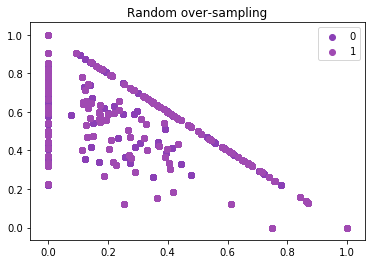

In [75]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')
print (X_ros.shape, X.shape)

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

In [76]:
pd.Series(y_ros).value_counts()

12    8638
11    8638
10    8638
9     8638
8     8638
7     8638
6     8638
5     8638
4     8638
3     8638
2     8638
1     8638
0     8638
dtype: int64

In [104]:
#X_result = result[tf_idf_features+vader_features+afinn_features]
#y_result = result[target]

### 5. Start the Machine Learning Classification
#### 5.1. On Vader Features

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros)

In [79]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((84220, 40), (28074, 40), (84220,), (28074,))

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

In [113]:
rf_clf.fit(X_ros, y_ros)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [129]:
X_smt.shape[0]- X.shape[0]

8336

In [114]:
rf_clf.score(X_test, y_test)

0.9967941867920496

In [116]:
print (classification_report(rf_clf.predict(X_ros), y_ros))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8640
           1       1.00      1.00      1.00      8639
           2       1.00      1.00      1.00      8647
           3       1.00      1.00      1.00      8650
           4       1.00      1.00      1.00      8661
           5       1.00      0.99      0.99      8666
           6       1.00      1.00      1.00      8661
           7       1.00      0.99      1.00      8663
           8       0.99      0.99      0.99      8583
           9       1.00      1.00      1.00      8646
          10       1.00      0.99      1.00      8647
          11       1.00      1.00      1.00      8660
          12       0.98      1.00      0.99      8531

    accuracy                           1.00    112294
   macro avg       1.00      1.00      1.00    112294
weighted avg       1.00      1.00      1.00    112294



In [117]:
rf_clf.feature_importances_

array([0.02366707, 0.03607694, 0.02970225, 0.04556183, 0.03025442,
       0.02291608, 0.03491267, 0.02431901, 0.01387532, 0.02275027,
       0.03013739, 0.04263219, 0.02446492, 0.02519437, 0.        ,
       0.0307563 , 0.04824352, 0.03225976, 0.02492831, 0.        ,
       0.00124203, 0.        , 0.02290066, 0.01587117, 0.03729773,
       0.02313445, 0.01730422, 0.02270129, 0.02398758, 0.02393711,
       0.03548505, 0.0358194 , 0.03674671, 0.03195271, 0.0343468 ,
       0.02731188, 0.01793316, 0.01868685, 0.00954213, 0.02114644])

In [118]:
print (confusion_matrix(rf_clf.predict(X), y))

[[ 110    0    0    0    0    0    0    0    1    0    0    0    1]
 [   0  179    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0  827    0    0    0    0    0    7    0    1    0    1]
 [   0    0    0  759    0    2    0    0    8    0    1    0    1]
 [   0    0    0    0 1776    4    0    0   13    0    2    1    1]
 [   0    0    0    0    0 5179    0    9   26    0    4    0   20]
 [   0    0    0    0    0    2 1323    1    8    1    2    0    8]
 [   0    0    0    0    0    5    0 3826   19    0    4    0   16]
 [   0    0    0    0    0    9    0    3 8512    0   13    0   46]
 [   0    0    0    0    0    1    0    0    3 1525    1    0    5]
 [   0    0    0    0    0    1    0    0   13    0 5128    1   30]
 [   0    0    0    0    0    1    0    3   13    0    0 2184    8]
 [   0    0    0    0    0    5    0    0   15    0    9    1 8321]]


### 6. Validation